<center>   <h1><b>Statistics (cdf, ppf, prf) t_test, z_test </b> </h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_mean = 18.7 # given
t_std = 5.8 # given
n_trips = 2000 #given

#### Question 1

In [3]:

#Asked: should earn over 20

In [4]:
import scipy.stats as stats

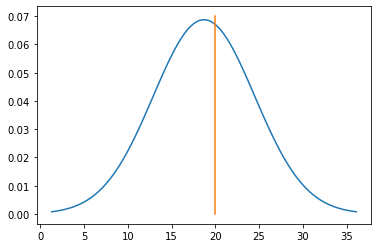

In [5]:
x = np.linspace(t_mean-3*t_std, t_mean+3*t_std, 100)
plt.plot(x, stats.norm.pdf(x, t_mean, t_std));
plt.plot([20,20,20],[0,0.01,0.07]);

### stats.norm.cdf

In [6]:
#The formula to find the left area of the curve until 20
stats.norm.cdf(20, t_mean, t_std)

0.5886750107430825

In [7]:
# Then 1 - (above code) gives the right area of the curve
1-stats.norm.cdf(20, t_mean, t_std)

0.4113249892569175

In [8]:
# Now multiplying by number of trips 
#(Because above calculation was for only one unit trip)
2000*0.41

820.0

### stats.binom.cdf(x, n, p) 
x is the number of successes from n trials with the probability of success is p

In [9]:
# Let's find the probability of successes of having two tails
# from three coin toss where p of having tails = 0.6
print(3*((0.6**2)*((1-0.6)**1)))
stats.binom.pmf(2,3,0.6) # pmf returns the p of successes

0.43199999999999994


0.43199999999999994

### Question 3

In [10]:
n_trips = 5
# Asked: over 15 probability at least 3 trips out of 5 trips
right_area = 1 - stats.norm.cdf(15, t_mean, t_std)

In [11]:
#"binom.cdf(num_succ-1, num_trials, prob)" Excel -> "=BINOMDIST(B2,C2,D2,1)

In [12]:
print(right_area)
left_area = 1-right_area
print(left_area)

0.7382407127058933
0.2617592872941067


### Usually dist formulas calculates left curve area so if we need to know right area, we have to 1- left_area

In [13]:
# This formula calculates the probability of having
# 2 or less success from 5 trial whose probability = left_area
stats.binom.cdf(2,5,left_area)

0.8836952614939727

In [14]:
# Not having 2 or less successes from 5 trials where p = left_area
stats.binom.sf(2,5,left_area)

0.11630473850602734

In [15]:
#Additional
# If we are asked to find successes between [2 and 4], for example

In [16]:
stats.binom.cdf(4,5,right_area)

0.7807245754350454

In [17]:
stats.binom.cdf(1, 5, right_area)

0.018557998317456286

In [18]:
# This formula equals to excel formula --> BINOM.DIST.RANGE(5,right_area,2,4)
stats.binom.cdf(4,5,right_area)-stats.binom.cdf(1, 5, right_area)

0.7621665771175891

### Question 2

In [19]:
n_trips = 5
# Asked: All of trip to get 15 or over
left_a = stats.norm.cdf(15, t_mean, t_std)
right_a = 1-left_a

In [20]:
stats.binom.cdf(0,5,left_a)

0.21927542456495466

### Question 8

Given:
$$ p = 0.6 $$

$$ \hat{p} = 0.5 $$

$$ n = 50$$

Then:
$$ var = \hat{p}*(1-\hat{p})$$

$$ std = \frac{\sqrt{var}}{\sqrt{n}}$$

$$z = \frac{(p-\hat{p})}{std}$$

$ \hat{p} $ is a mean for Ha and p is from sample we got 

from scipy.stats import norm

norm.cdf(1.96)

0.9750021048517795

norm.cdf(-1.96)

0.024997895148220435

### stats.norm.ppf

In [21]:
# This formula will calculate z value, two-tail
# Where confidence interval for 99 %, z value is 2.575
stats.norm.ppf(0.995)
# It means that 99% confidence interval lies 
#2.575 standard deviation from the mean 
#where mean = 0 and std = 1

2.5758293035489004

In [22]:
stats.norm.cdf(2.575)
# It will give the confidence interval of the given value 
#(std of how many times far from the mean (z))

0.9949879956682387

In [23]:
stats.norm.cdf(1.4142)

0.9213484060057744

In [24]:
p_val = 1- stats.norm.cdf(1.4142)
p_val

0.07865159399422561

### Question 10

In [25]:
m = 85
std_sample = 32
n = 16


In [26]:
std_r = std_sample/np.sqrt(n)

In [27]:
z =stats.norm.ppf(0.95)

In [28]:
marg_errors = z*std_r

In [29]:
conf_int_min  = m-marg_errors
conf_int_max  = m+marg_errors

In [30]:
print(conf_int_min, 'to ', conf_int_max)

71.84117098438823 to  98.15882901561177


In [31]:
#Studnt, n=999, p<0.05, 2-tail\
#equivalent to Excel T.INV(0.05,999) or T.INV.2T(0.1, 999)
#90% confidence interval
#print stats.t.ppf(1-0.025, 999)

#Studnt, n=999, p<0.05%, Single tail\
#equivalent to Excel TINV(2*0.05,999)\
#print stats.t.ppf(1-0.05, 999)

In [32]:
#But t is used more

### stats.t.ppf

In [33]:
t = stats.t.ppf(0.95,15)
marg_errors = std_r*t
conf_int_min  = m-marg_errors
conf_int_max  = m+marg_errors
print(conf_int_min, 'to ', conf_int_max)

70.97559715445956 to  99.02440284554044


### Question 14

In [34]:
uber = pd.read_excel('data2.xlsx', sheet_name = 'Uber pay')

In [35]:
uber.head(2)

,DriverID,City,Gender,Trips,Hourly Pay,Unnamed: 5
0,1,New York,Male,493,7.49,NaN
1,2,Boston,Male,1195,8.20,NaN


In [36]:
chic_mal = uber[(uber['City']=='Chicago')&(uber['Gender']=='Male')]['Hourly Pay']

In [37]:
std = chic_mal.std()
mean = chic_mal.mean()
n = len(chic_mal)

In [38]:
t = stats.t.ppf(0.975, 181)
std_n = std/np.sqrt(n)

In [39]:
marg_err = t*std_n
marg_err

0.27923413996605523

### Question 15

In [40]:
fem_pay = uber[uber['Gender']=='Female']['Hourly Pay']

In [41]:
mean = fem_pay.mean()
std = fem_pay.std()
n = len(fem_pay)

In [42]:
t = stats.t.ppf(0.975, n-1)
std_n = std/np.sqrt(n)
marg_err = t*std_n
conf_int_min = mean-marg_err
conf_int_max = mean+marg_err
print(conf_int_min, conf_int_max)

7.211959435480943 7.670625598532671


In [43]:
male = uber['Gender'].value_counts()[0]
female = uber['Gender'].value_counts()[1]

In [44]:
p = female/(male+female)
n = male+female

In [45]:
z = stats.norm.ppf(0.975)

In [46]:
t = stats.t.ppf(0.975, n-1)

In [47]:
std = np.sqrt(p*(1-p)/n)

In [48]:
marg_err = t*std
max_conf = p+marg_err
min_conf = p-marg_err
print(min_conf, max_conf)

0.2657283864579868 0.32227161354201317


### Question 16

In [49]:
# Ho: m>= m_sample
# Ha: m< m_sample    

In [50]:
population_mean = 7.25
sample_mean = uber['Hourly Pay'].mean()
alfa = 0.05

In [51]:
n = len(uber)
samp_std = uber['Hourly Pay'].std()
pop_std = samp_std/np.sqrt(n)

In [52]:
z = (sample_mean - population_mean)/pop_std

In [53]:
print(sample_mean)
print(samp_std)
n

7.893409999999993
1.9947413528989075


1000

### stats.t.cdf

In [54]:
p = 1 - stats.t.cdf(z, 999,0)
p
# we will reject the null H and agree with the Ha
# that uber driver earns more than pop_mean

0.0

In [55]:
pop_std

0.06307926018086264

In [56]:
stats.norm.cdf(7.89, 7.25, 0.06)

1.0

### Question 18

# Two sample t test

In [57]:
chicago = uber[uber['City'] =='Chicago']['Hourly Pay']
york = uber[uber['City'] =='New York']['Hourly Pay']

In [58]:
ch_m = chicago.mean()
ch_std = chicago.std()
ch_n = len(chicago)
york_m = york.mean()
york_std = york.std()
york_n = len(york)

$$ t = \frac{m1 - m2}{\sqrt{\frac{s1^2}{n1} +\frac{s2^2}{n2}}}$$

In [59]:
print(ch_m, ch_std, ch_n, york_m, york_std, york_n)

8.071140684410652 1.998541508080747 263 7.882751842751838 1.9597766271731287 407


In [60]:
# Ho: ch_m <= york_m
# Ha: ch_m > york_m    
t = (ch_m-york_m) / np.sqrt((ch_std**2)/ch_n + (york_std**2)/york_n) 

In [61]:
stats.t.cdf(t, ch_n+york_n-2)

0.8848237669591617

In [62]:
# just another example:

In [63]:
#Blackboard: Given:
m1 = 82
s1 = 2.4
n1 = 15

m2 = 84
s2 = 1.7
n2 = 12
alfa = 0.05

In [64]:
t = (m1-m2)/np.sqrt((s1**2)/n1 + (s2**2)/n2)
t

-2.5301595052287063

In [65]:
p = stats.t.cdf(t, 25)

In [66]:
# It is two tail test, because m1 != m2 (either high or low)
# So alfa = alfa/2 = 0.025
print(p)
alfa/2

0.00903684801412631


0.025

**p is lower than alfa, so we reject Ho and accept Ha, which is:

there is signicant difference between mean1 and mean2**

In [67]:
hotel = pd.read_excel('data2.xlsx', sheet_name = 'hotel')

In [68]:
hotel.head()

,BookingID,Channel,Weekday,Rate,Cancelled
0,1,Online,Tuesday,385.56,False
1,2,Online,Wednesday,305.15,False
2,3,Online,Thursday,559.00,True
3,4,Online,Monday,424.15,False
4,5,Online,Sunday,459.00,True


### Question 19

In [69]:
rate = hotel['Rate']

In [70]:
r_m = rate.mean()
r_s = rate.std()
r_n = len(rate)

In [71]:
# Asked: build 95% confidence interval for rate
z = stats.norm.ppf(0.975)
t = stats.t.ppf(0.975, 999)
print(z, t)

1.959963984540054 1.9623414611334487


In [72]:
pop_std = r_s/np.sqrt(r_n)

In [73]:
marg_er = pop_std*z

In [74]:
min_conf = r_m -marg_er
max_conf = r_m + marg_er
print(min_conf, max_conf)

295.33095035193713 304.31864679106235


In [75]:
marg_er = pop_std*t
min_conf = r_m -marg_er
max_conf = r_m + marg_er
print(min_conf, max_conf)

295.3254992216916 304.3240979213079


### Question 20

In [76]:
# alfa = 0.05
# Ho: r_m <= 300
# Ha: r_m > 300    

In [77]:
t = (r_m-300)/pop_std # We should (x-x_mean)/(std/sqrt(n))

In [78]:
p = stats.t.cdf(t, 999) # to find how much area it will
# cover when the distance from mean is equal to t*std

In [79]:
p

0.4695529077738393

### Question 21

In [80]:
online = hotel[hotel['Channel']=='Online']['Rate']
offline = hotel[hotel['Channel']!='Online']['Rate']

In [81]:
of_mean = offline.mean()
of_std = offline.std()
of_len = len(offline)
on_mean = online.mean()
on_std = online.std()
on_len = len(online)

In [82]:
# Ho: of_mean >= on_mean
# Ha: of_mean < on_mean
alpha = 0.05

In [83]:
t = (of_mean-on_mean)/np.sqrt(of_std**2/of_len + on_std**2/on_len)

In [84]:
stats.t.cdf(t, of_len+on_len-2) # p value is higher than alpha

0.2890174472520236

### Question 22

In [85]:
hotel[hotel['Channel']=='Online'][['Rate',
                                   'Cancelled']].groupby('Cancelled').count()

,Rate
Cancelled,
False,611
True,224


In [86]:
cancelled = 224
not_cancelled = 611
percent = 20
# Let's start
p_pop = 0.20
p_sample = cancelled/(cancelled+not_cancelled)
n = cancelled+not_cancelled
std = np.sqrt(p_pop*(1-p_pop)/n)
z = (p_sample - p_pop)/std
z

4.9314158489676245

In [87]:
# Ho: p_sample =< 0.2
# Ha: p_sample > 0.2
alpha = 0.05
upper_bound = 0.95

In [88]:
print(p_sample, std)

0.2682634730538922 0.013842570804119656


In [89]:
p = stats.norm.cdf(z)

In [90]:
# stats.binom.cdf(p_sample, 0.2, std) is different thing,
# we can't use. (above)
stats.norm.cdf(p_sample*100, p_pop*100, std*100) 

0.9999995918213253

In [91]:
p # it is higher than upper bound, so we reject null H,
# therefore p_sample is higher than 0.2

0.9999995918213253

### Question 23

In [92]:
stats.norm.cdf(6,8,12) # area until 6 so 1- ..
# gives the area starting from 6 till end

0.43381616738909634

In [93]:
stats.norm.cdf(6,15,30) # the same like above

0.3820885778110474

### Question 24

In [94]:
1-stats.norm.cdf(40,32.4, 3.6) # over 40

0.01738138131111422

### Question 25

In [95]:
stats.norm.ppf(0.75, 32.4, 3.6)
# gives the percentile (counter cdf) 
# it gives 75% point where mean = 32.4 and std = 3.6

34.82816310070589

### Question 26

In [96]:
z_m = 8
z_s = 12
c_m = 15
c_s = 30

In [97]:
m_diff = z_m-c_m
s_diff = np.sqrt(z_s**2 + c_s**2)
z = m_diff/s_diff
#Asked:  when m_diff < 0

In [98]:
m_diff

-7

In [99]:
stats.norm.cdf(0, m_diff, s_diff) # it is when m_diff < 0

0.5857573222326861

In [100]:
stats.norm.cdf(z)

0.41424267776731394

### Question 27

In [101]:
n = 8
price = 30
mean = 0.08
std = 0.12
total = 400

In [102]:
single = total/n
single

50.0

In [103]:
stats.norm.cdf(50, 32.4, 3.6) # till 50
1-stats.norm.cdf(50, 32.4, 3.6) # over 50
# almost 0

5.070335422630023e-07

In [104]:
c_price = 30
c_mean= 0.08
c_std = 0.12
z_price = 40
z_mean = 0.15
z_std = 0.3
minimize = 50
n_share = 20

In [105]:
stats.norm.ppf(0.5, 32.4, 3.6)

32.4

In [106]:
new_df=pd.DataFrame(np.arange(1,21))

In [107]:
new_df['zoom_price'] = z_price
new_df['zoom_mean'] = z_mean
new_df['zoom_std'] = z_std
new_df['cloud_price'] = c_price
new_df['cloud_mean'] = c_mean
new_df['cloud_std'] = c_std

In [108]:
new_df = new_df.rename(columns= {0:'share_count'})

In [109]:
new_df['zoom_return'] = new_df['share_count']*(new_df['zoom_price']+
                                               new_df['zoom_price']*new_df['zoom_mean'])

In [110]:
new_df['zoom_return_std'] = np.sqrt(new_df['zoom_std']**2*new_df['share_count'])

In [111]:
new_df['cloud_return'] = new_df['share_count']*(new_df['cloud_price']+
                                                new_df['cloud_price']*new_df['cloud_mean'])
new_df['cloud_return_std'] = np.sqrt(new_df['cloud_std']**2*new_df['share_count'])

In [112]:
new_df

,share_count,zoom_price,zoom_mean,zoom_std,cloud_price,cloud_mean,cloud_std,zoom_return,zoom_return_std,cloud_return,cloud_return_std
0,1,40,0.15,0.3,30,0.08,0.12,46.0,0.300000,32.4,0.120000
1,2,40,0.15,0.3,30,0.08,0.12,92.0,0.424264,64.8,0.169706
2,3,40,0.15,0.3,30,0.08,0.12,138.0,0.519615,97.2,0.207846
3,4,40,0.15,0.3,30,0.08,0.12,184.0,0.600000,129.6,0.240000
4,5,40,0.15,0.3,30,0.08,0.12,230.0,0.670820,162.0,0.268328
5,6,40,0.15,0.3,30,0.08,0.12,276.0,0.734847,194.4,0.293939
6,7,40,0.15,0.3,30,0.08,0.12,322.0,0.793725,226.8,0.317490
7,8,40,0.15,0.3,30,0.08,0.12,368.0,0.848528,259.2,0.339411
8,9,40,0.15,0.3,30,0.08,0.12,414.0,0.900000,291.6,0.360000
9,10,40,0.15,0.3,30,0.08,0.12,460.0,0.948683,324.0,0.379473


In [113]:
drive = pd.read_excel('data2.xlsx', 
                      sheet_name= 'drive-through')

In [114]:
drive

,Customer,Time
0,1,138.6
1,2,43.3
2,3,57.5
3,4,84.2
4,5,44.7
...,...,...
195,196,88.4
196,197,198.4
197,198,36.9
198,199,47.6


### Question 29

In [115]:
st_err = stats.sem(drive['Time']) # standard error
st_err

4.7617343188819445

In [116]:
drive['Time'].std()/np.sqrt(len(drive))
# equialent for std_error = std/sqrt(n)

4.7617343188819445

### 1 st way for confidence interval when alpha = 0.90

In [117]:
mean= drive['Time'].mean()

In [118]:
t = stats.t.ppf(0.95, len(drive) - 1)

In [119]:
marg_err = t*st_err

In [120]:
mean-marg_err

89.31801144522497

In [121]:
mean+marg_err

105.05598855477506

### 2 nd way for confidence interval when alpha = 0.90

In [122]:
stats.t.interval(alpha = 0.9, 
                 df = len(drive)- 1, 
                 loc = np.mean(drive['Time']), 
                 scale = stats.sem(drive['Time']))

(89.31801144522497, 105.05598855477506)

### Question 30

In [123]:
light = pd.read_excel('data2.xlsx', sheet_name = 'lightbulbs')

In [124]:
light.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


In [125]:
# Ho: life <= 1000;
# Ha: life > 1000;
alpha = 0.05

### 1st way

In [126]:
mean = light['Lifetime'].mean()
std = light['Lifetime'].std()
n = len(light)
pop_std = std/np.sqrt(n)

In [127]:
t = (mean -1000)/pop_std
t

-1.0303562006210676

In [128]:
stats.t.cdf(t, n-1) 
# this tells us that 
# sample_mean - pop_mean < 0 has the area of 0.15,
# so 1- p gives the area of sample_mean-pop_mean> 0
1- stats.t.cdf(t, n-1) # this is final p value

0.8473232451095432

### second way

In [129]:
stats.ttest_1samp(light['Lifetime'],
                  1000, 
                  alternative = 'greater')

Ttest_1sampResult(statistic=-1.0303562006210678, pvalue=0.8473232451095432)

### Question 31:

In [130]:
battery = pd.read_excel('data2.xlsx', sheet_name = 'battery')

In [131]:
# Ho: brand_1 = brand2
# Ha: brand1 != brand2
alpha = 0.05

### 1st:

In [157]:
battery.columns = ['battery', 'brand_1', 'brand_2']

In [158]:
b1_mean=battery['brand_1'].mean()
b1_std = battery['brand_1'].std()
b2_mean=battery['brand_2'].mean()
b2_std = battery['brand_2'].std()
b1_len = len(battery['brand_1'])
b2_len = len(battery['brand_2'])

In [159]:
t = (b1_mean - b2_mean)/np.sqrt(b1_std**2/ b1_len + b2_std**2/b2_len)

In [160]:
t

0.7677462249616107

In [163]:
print(stats.t.cdf(t, b1_len +b2_len -2))
# lower tail
print(1 -stats.t.cdf(t, b1_len +b2_len -2))
# upper tail
print((1 -stats.t.cdf(t, b1_len +b2_len -2))*2)
# two-sided
# so p value is greater than alpha, we can't reject Ho

0.778223713623696
0.22177628637630398
0.44355257275260795


### 2nd:

In [162]:
stats.ttest_ind(battery['brand_1'],
                battery['brand_2'],
                alternative = 'two-sided')
# p value is 0.46, so divided by two (two_sided)

Ttest_indResult(statistic=0.76774622496159, pvalue=0.4435525727526203)

In [138]:
df = pd.DataFrame({'col_1':[10, 9, 11, 8, 14, 6],
                   'col_2':[11, 12, 7, 10, 8,13]})

In [139]:
mean_1 = df['col_1'].mean()
std_1 = df['col_1'].std()
n_1 = len(df)
mean_2 = df['col_2'].mean()
std_2 = df['col_2'].std()
n_2 = len(df)

In [153]:
t = (mean_1 - mean_2)/np.sqrt(std_1**2/n_1 + std_2**2/n_2)
p = stats.t.cdf(t, n_1+n_2-2)
print(t, p)

-0.34188172937891387 0.3697579336002253


In [152]:
stats.ttest_ind(df['col_1'], 
                df['col_2'],
                alternative='two-sided')

Ttest_indResult(statistic=-0.34188172937891387, pvalue=0.7395158672004506)

### Question 33

## Paired two sample t-Test

In [200]:
import pandas as pd
import scipy.stats as stats

In [169]:
# We have a dataset for the scores before training and after training

In [201]:
train = pd.read_excel('data2.xlsx', sheet_name = 'training')
train.head(3)

,Employee,Score_Before,Score_After
0,1,84,84
1,2,66,85
2,3,84,87


### Question

In [ ]:
# Is score after training is significantly higher than
# score before training at 5 % significance level?
# Ho: score_after <= score_before
# Ha: score_after > score_before

In [202]:
before = train['Score_Before']
after = train['Score_After']

## 1st:

In [215]:
diff = after -before

In [206]:
t = diff.mean()/(np.sqrt(diff.std()**2/len(diff)))

In [207]:
t

7.494583135258959

In [212]:
p = 1 -stats.t.cdf(t, n-1)
print(p)
stats.t.cdf(t, n-1)

2.2653242615078284e-09


0.9999999977346757

In [175]:
alpha = 0.05
0.95
1- alpha
# Reject our Ho
# Accept Ha

0.95

## 2nd

In [213]:
stats.ttest_rel(after,before, alternative = 'greater')

Ttest_relResult(statistic=7.49458313525896, pvalue=2.2653242936330923e-09)

In [149]:
!jupyter nbconvert --to webpdf  Assign_cdf.ipynb

[NbConvertApp] Converting notebook Assign_cdf.ipynb to webpdf
[NbConvertApp] Writing 474316 bytes to Assign_cdf.pdf
